<a href="https://colab.research.google.com/github/leolani/cltl-face-all/blob/master/examples/colab/4.ERC-MELD-compact-visual-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the precomputed visual features

In [ ]:
!pip install tqdm av
!gdown --id 1P7pIYQAG3ePjaCLJf7F_g7DOBzTr7Tva
!gdown --id 16ck7plW9v9eSHGCs5wuB2AhhufPRt3Wi
!unzip smaller-dataset.zip
!rm smaller-dataset.zip

!wget https://raw.githubusercontent.com/leolani/cltl-face-all/master/examples/smaller-datasets-jsons/datasets.json
import json

with open('datasets.json', 'r') as stream:
    datasets = json.load(stream)

datasets = datasets['large']

## Unpickle it

In [2]:
import pickle

with open('compact-visual.pkl', 'rb') as stream:
    pickled = pickle.load(stream)

X = pickled['X']
y = pickled['y']
original_diautt = pickled['original_diautt']

## stack them up to make it even easier.

If you run below cell, it shows that every data sample has three axis (time, num_landmarks, 2). Every data point has different time length. Every data sample has corresponding label, which is a one hot vector of length 7

In [4]:
import numpy as np
for (key, val), (key_, val_) in zip(X.items(), y.items()):
    assert key == key_
    assert len(val) == len(val_)

    for idx, visual_features in enumerate(val):
        X[key][idx] = np.stack(visual_features)

for (key, val), (key_, val_) in zip(X.items(), y.items()):
    print(key)
    for visual_features, label in zip(val[:10], val_[:10]):
        print(visual_features.shape, label.shape)
    print()

train
(9, 68, 2) (7,)
(54, 68, 2) (7,)
(86, 68, 2) (7,)
(64, 68, 2) (7,)
(45, 68, 2) (7,)
(28, 68, 2) (7,)
(30, 68, 2) (7,)
(27, 68, 2) (7,)
(61, 68, 2) (7,)
(134, 68, 2) (7,)

dev
(30, 68, 2) (7,)
(81, 68, 2) (7,)
(101, 68, 2) (7,)
(22, 68, 2) (7,)
(16, 68, 2) (7,)
(17, 68, 2) (7,)
(25, 68, 2) (7,)
(77, 68, 2) (7,)
(64, 68, 2) (7,)
(250, 68, 2) (7,)

test
(72, 68, 2) (7,)
(16, 68, 2) (7,)
(160, 68, 2) (7,)
(64, 68, 2) (7,)
(87, 68, 2) (7,)
(40, 68, 2) (7,)
(54, 68, 2) (7,)
(103, 68, 2) (7,)
(117, 68, 2) (7,)
(46, 68, 2) (7,)



The first data sample has time length of 5. I'll show you what this means.

Obviously this sequence of face is labeled as "disgust"

[0 1 0 0 0 0 0] 1 disgust


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


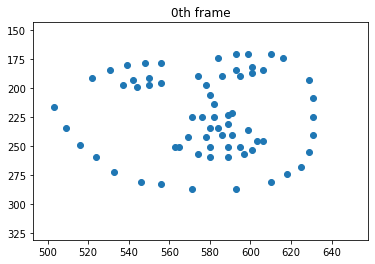

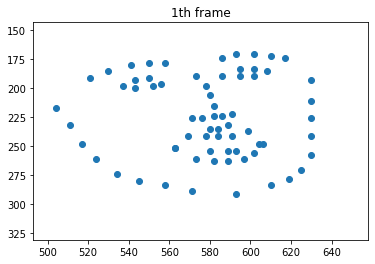

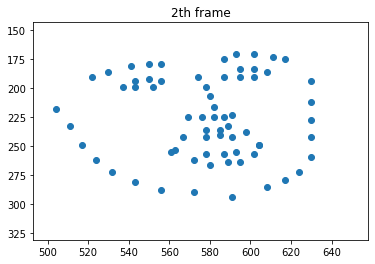

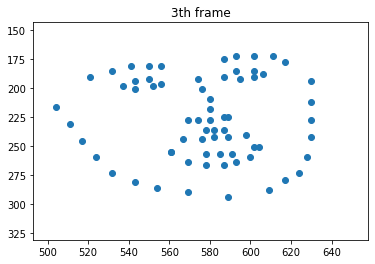

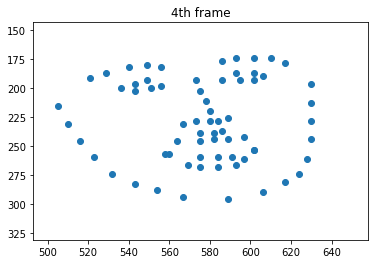

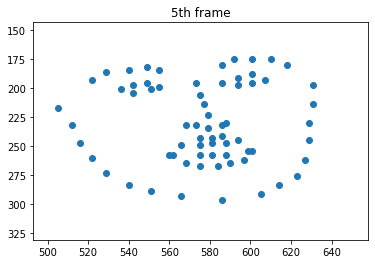

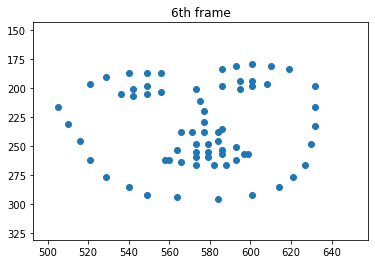

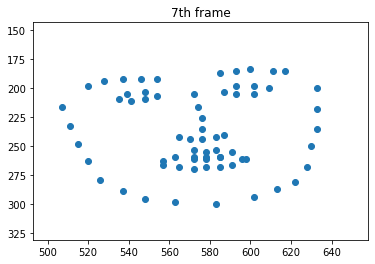

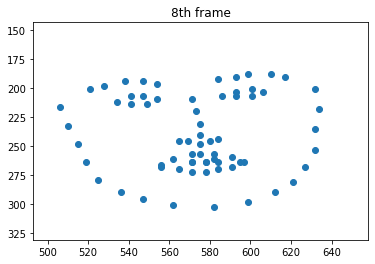

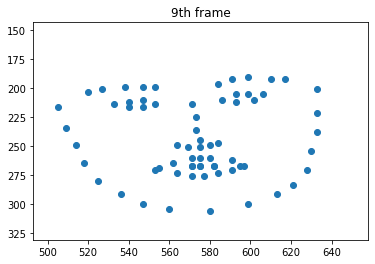

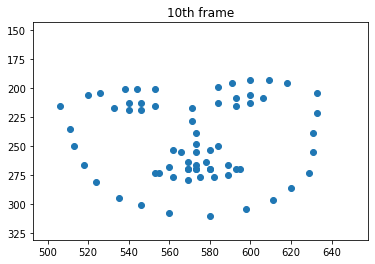

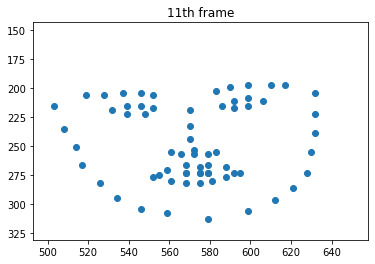

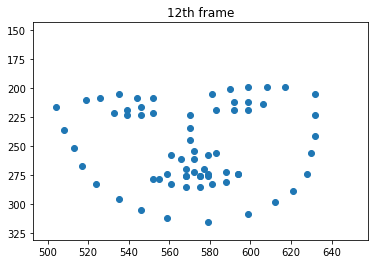

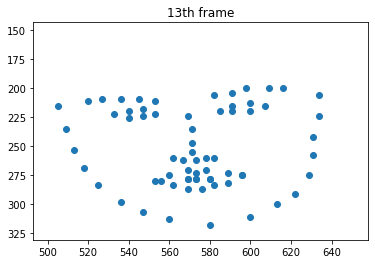

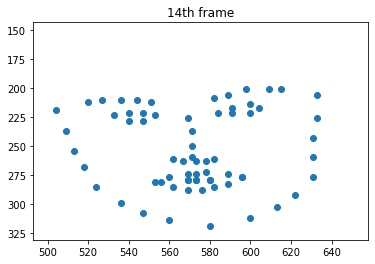

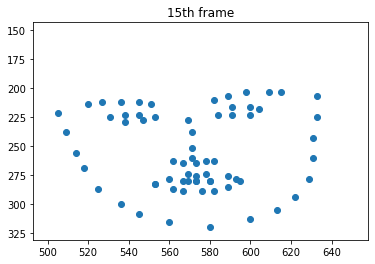

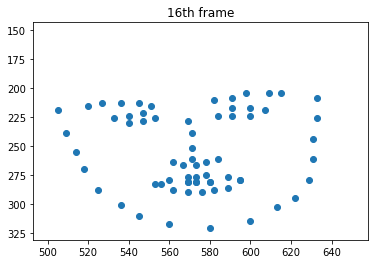

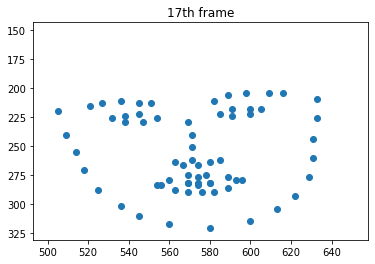

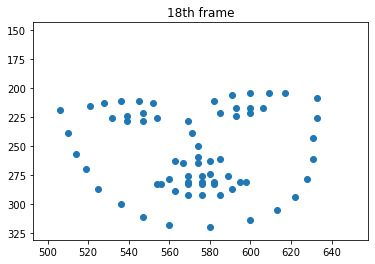

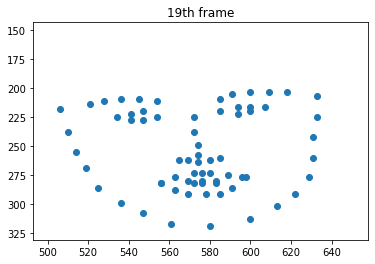

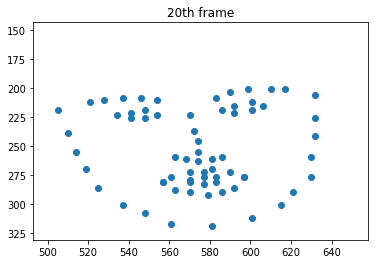

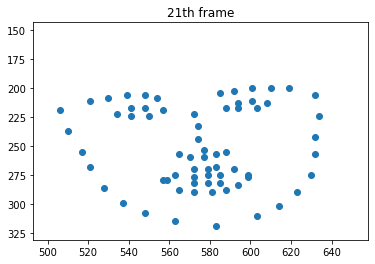

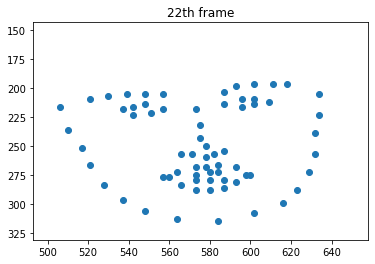

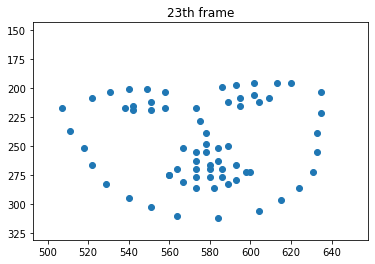

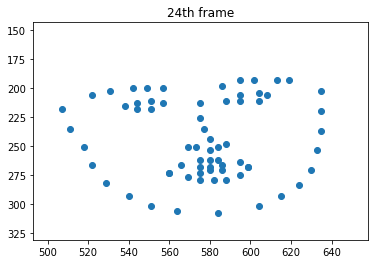

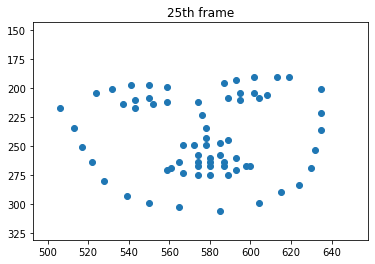

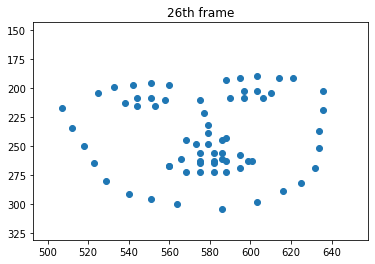

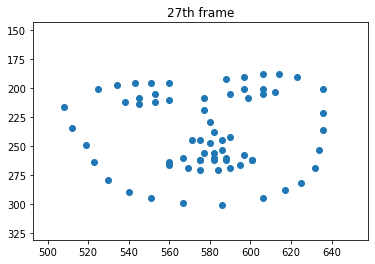

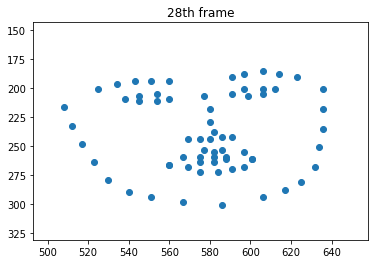

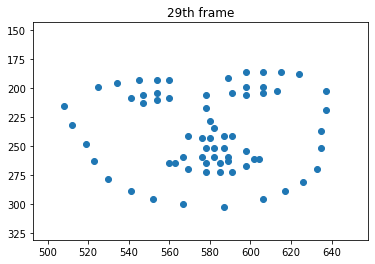

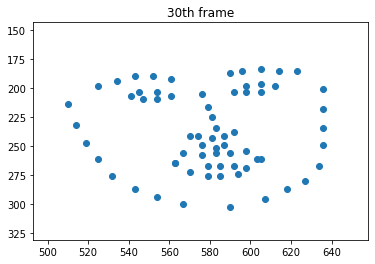

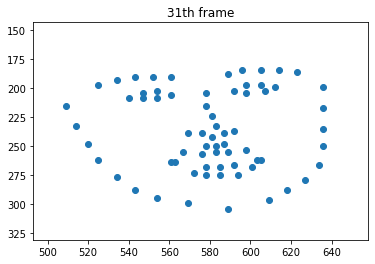

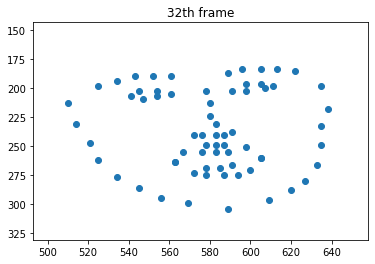

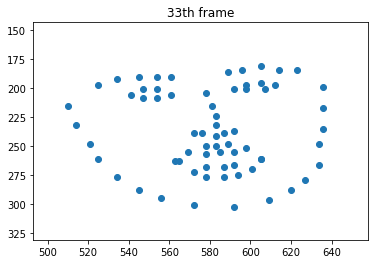

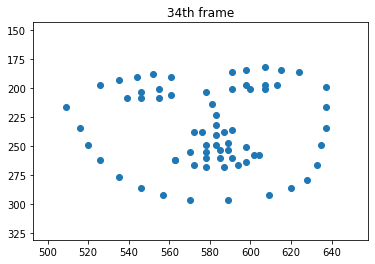

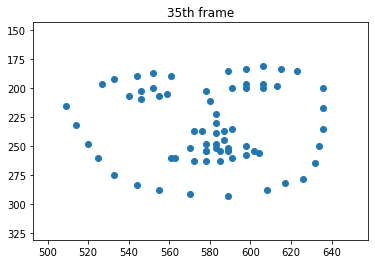

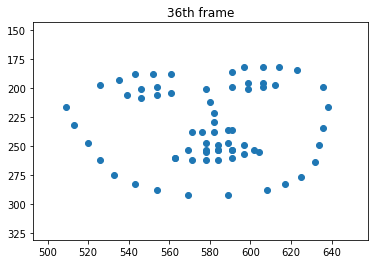

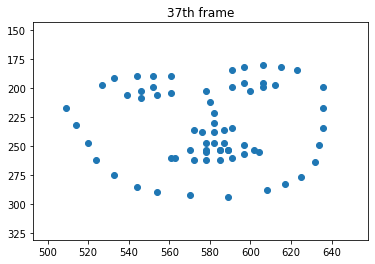

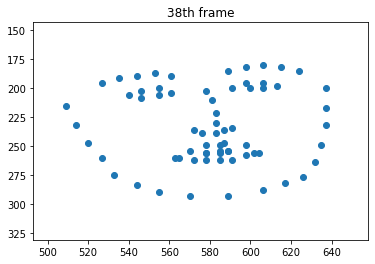

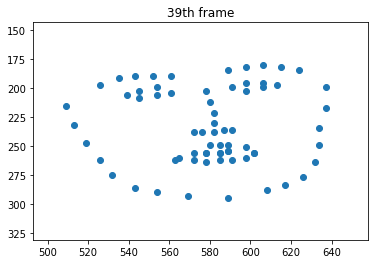

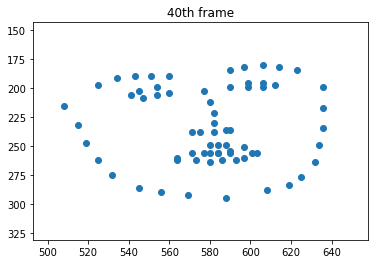

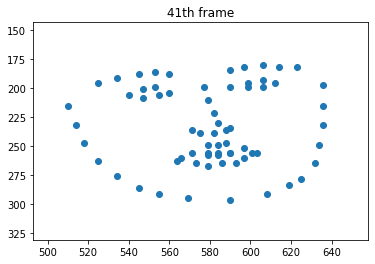

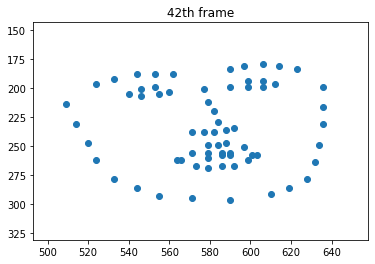

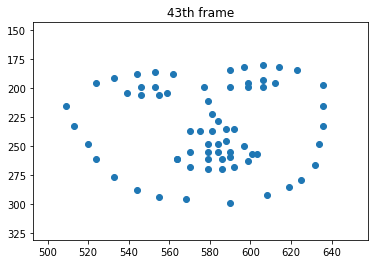

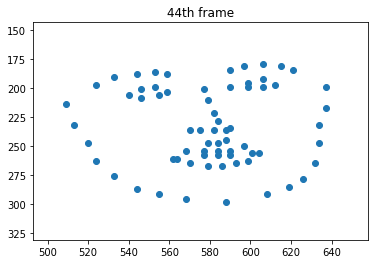

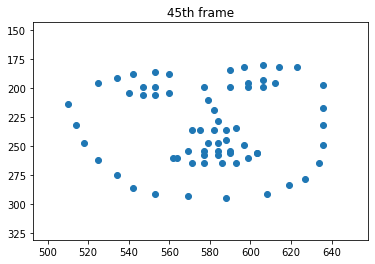

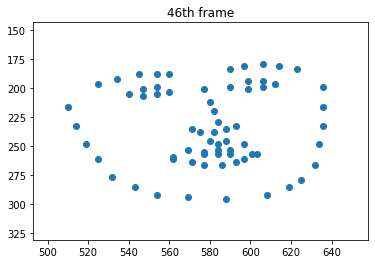

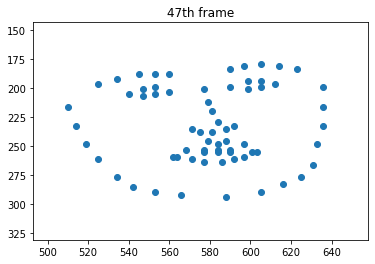

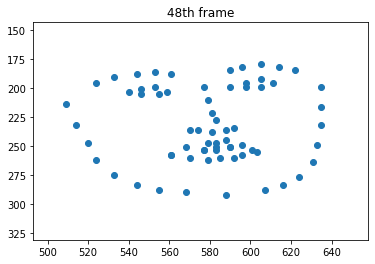

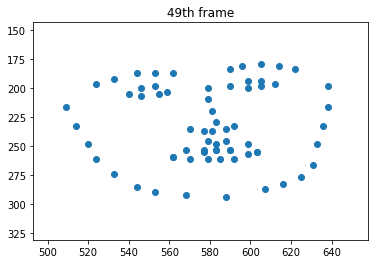

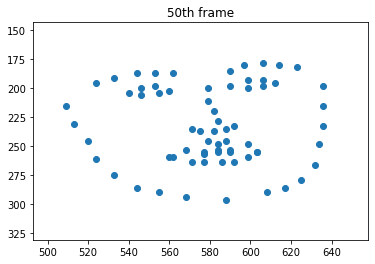

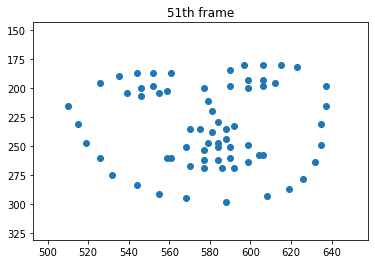

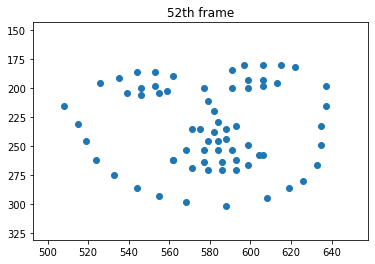

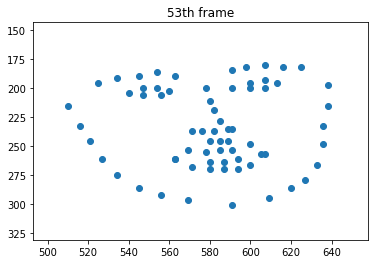

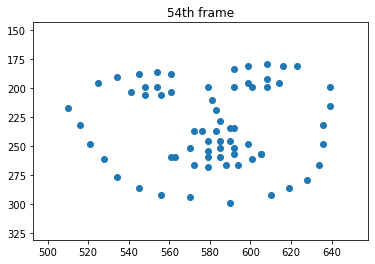

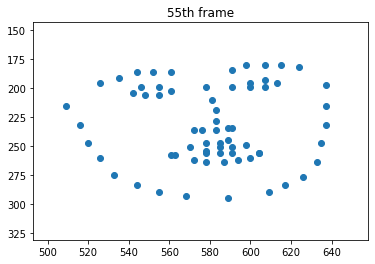

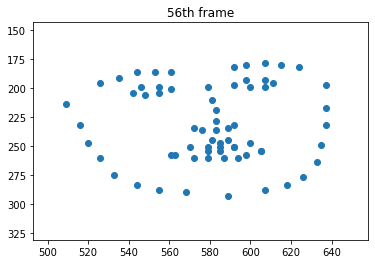

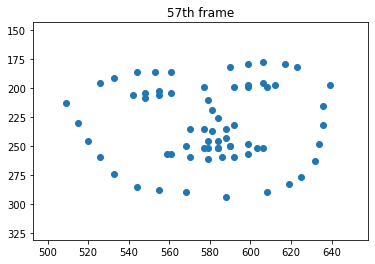

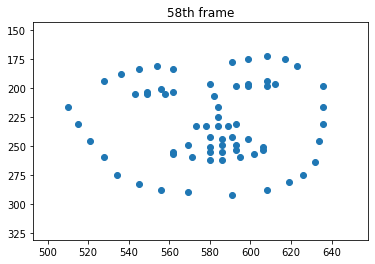

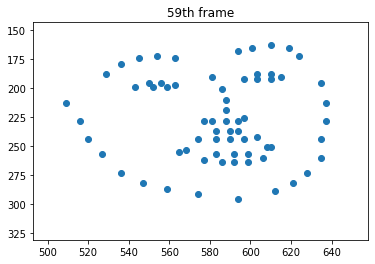

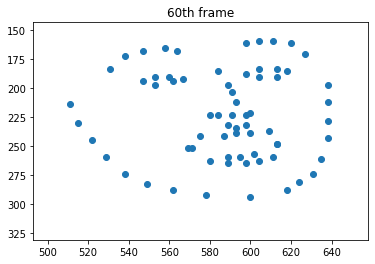

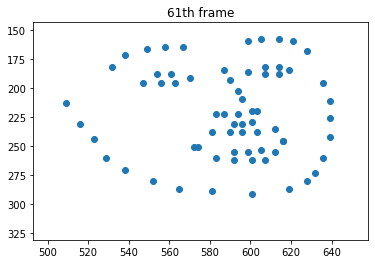

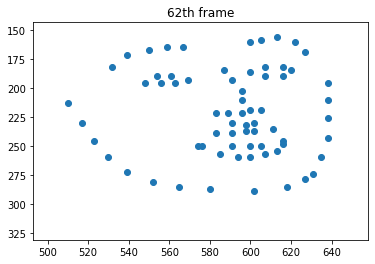

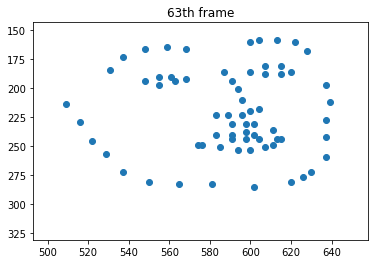

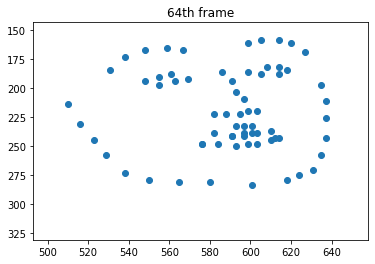

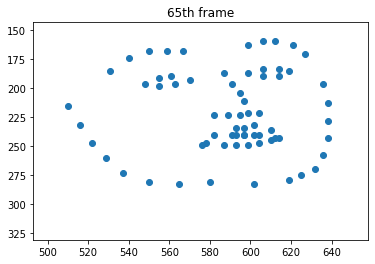

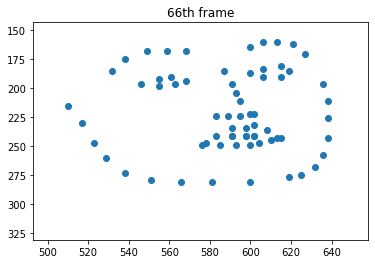

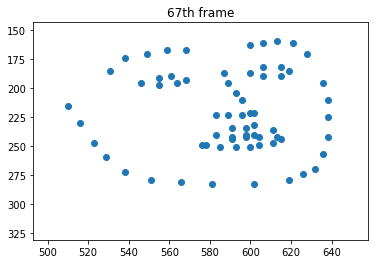

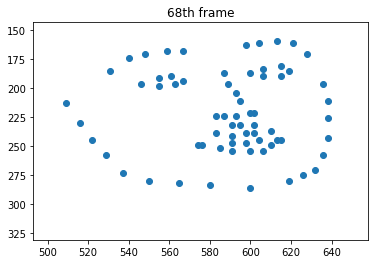

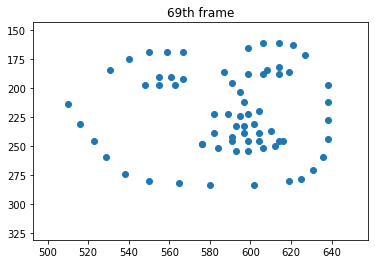

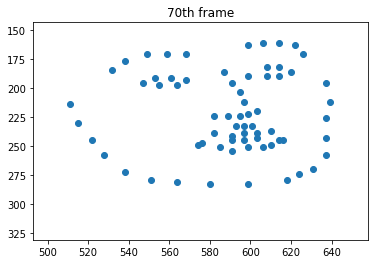

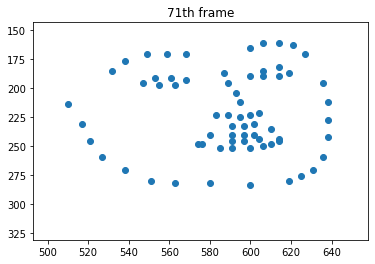

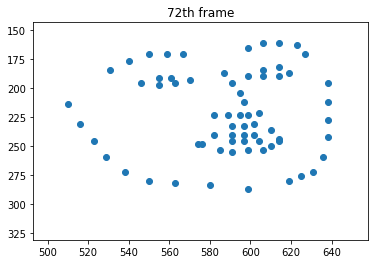

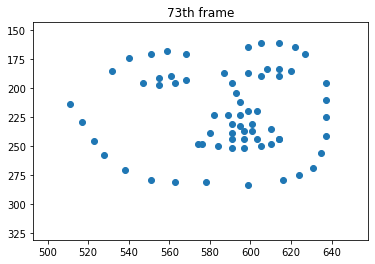

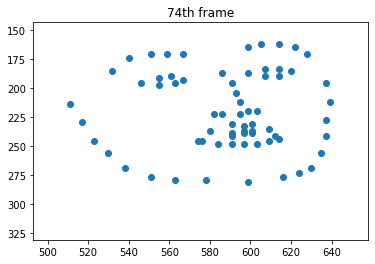

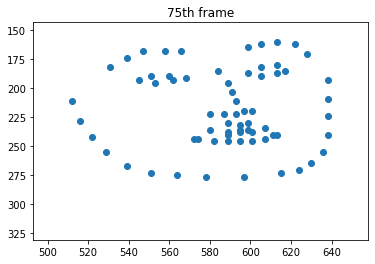

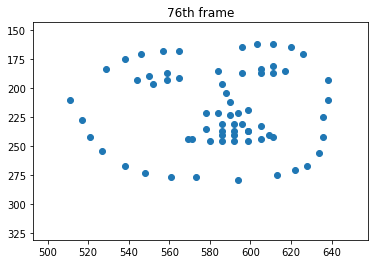

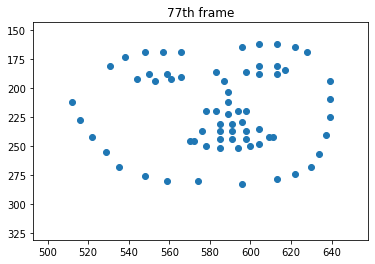

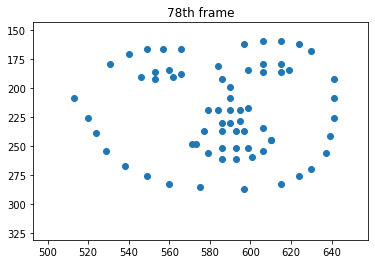

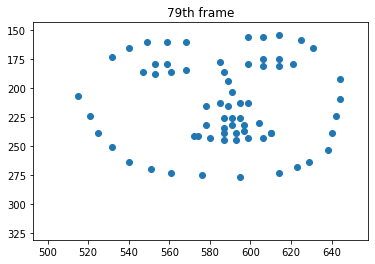

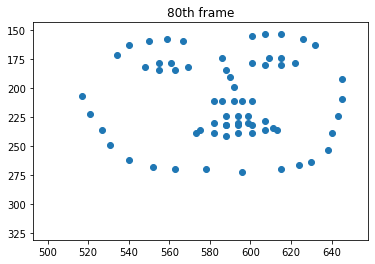

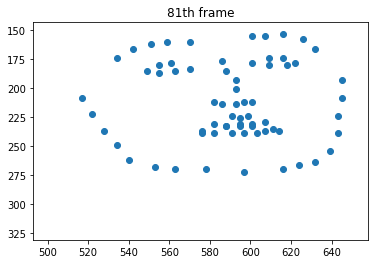

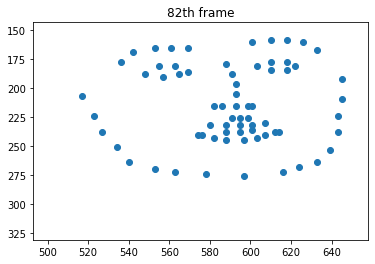

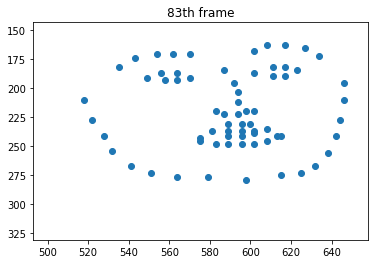

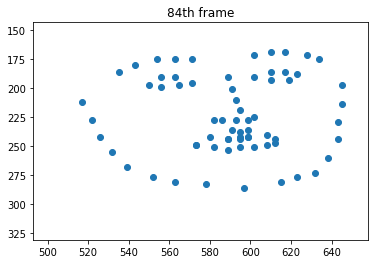

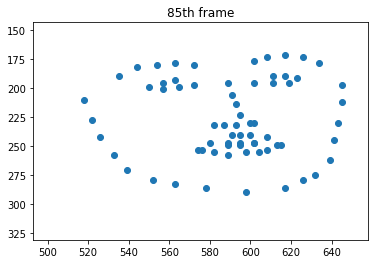

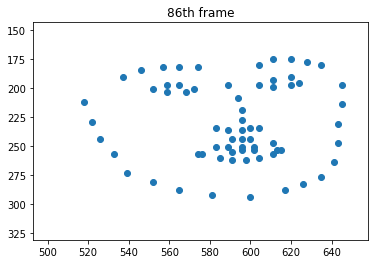

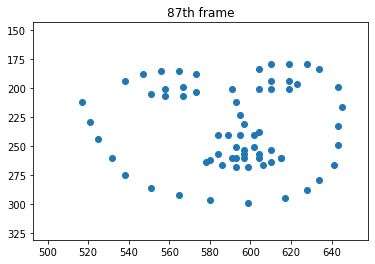

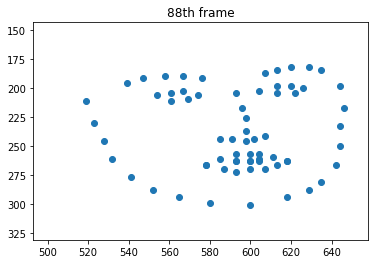

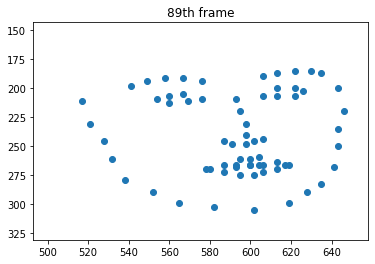

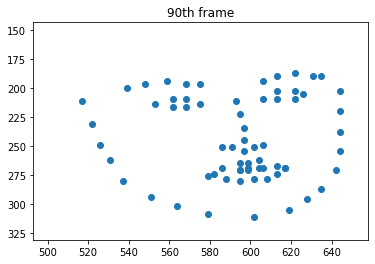

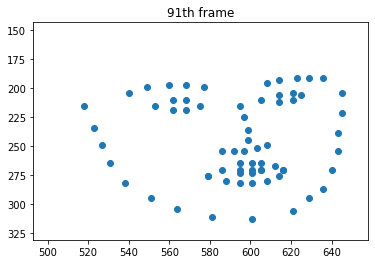

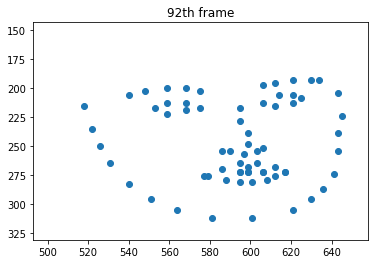

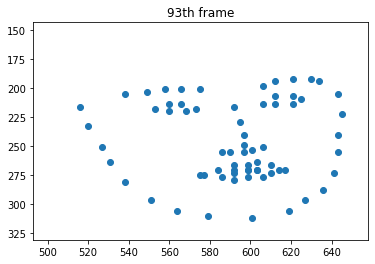

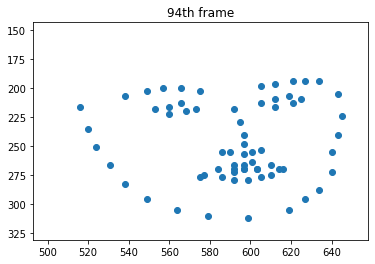

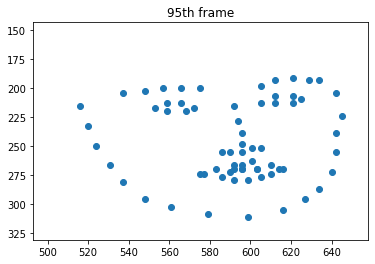

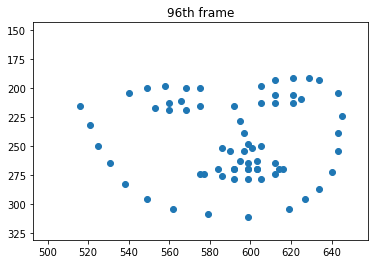

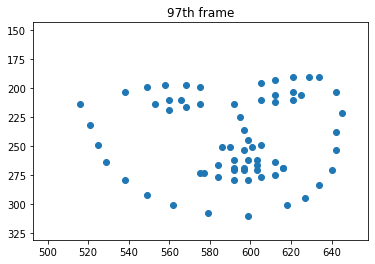

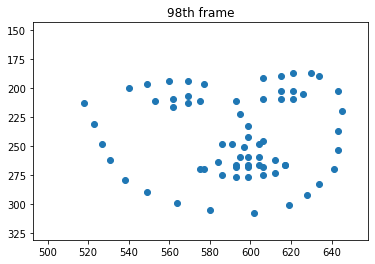

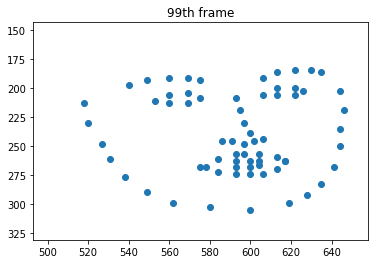

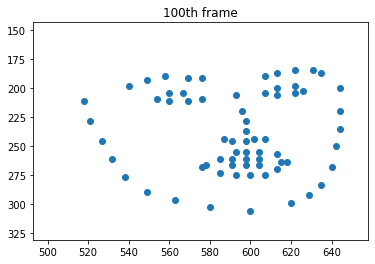

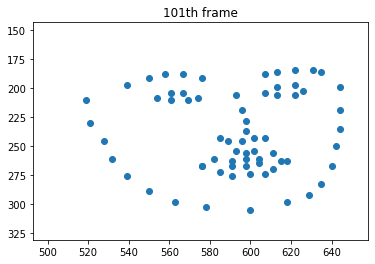

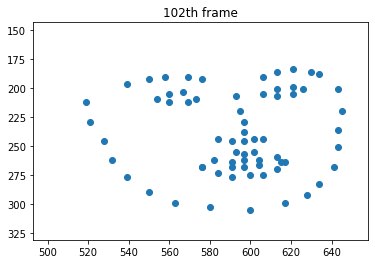

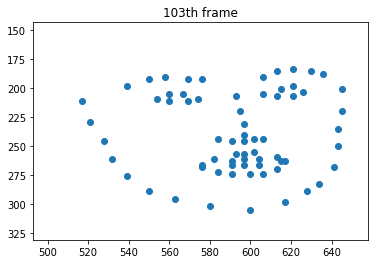

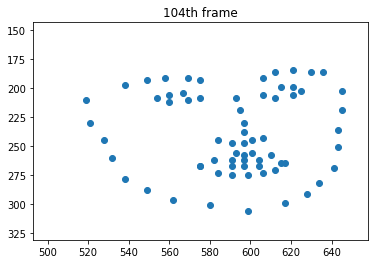

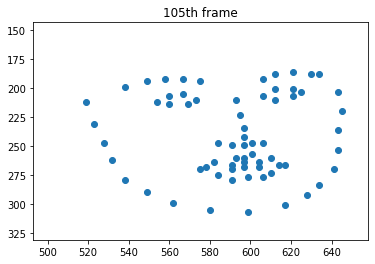

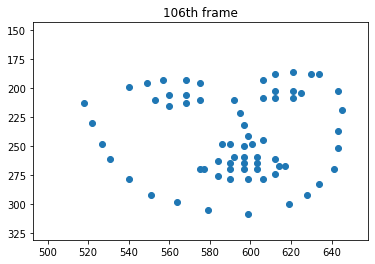

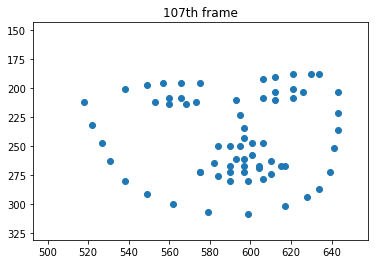

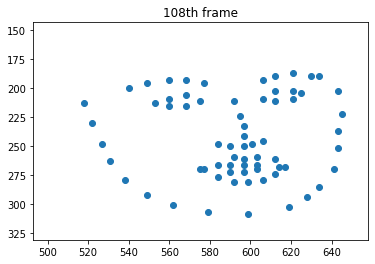

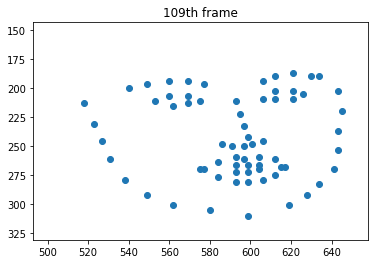

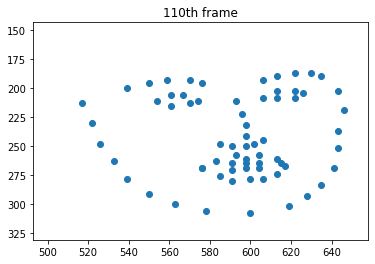

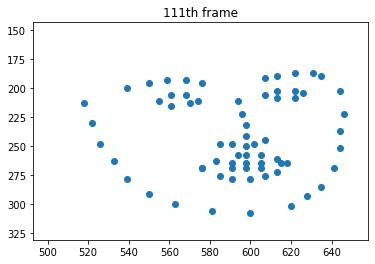

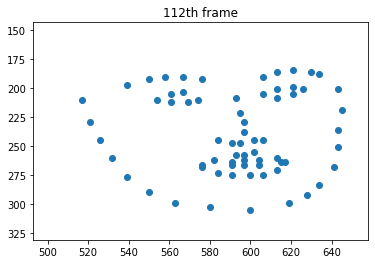

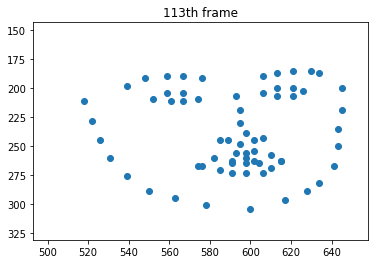

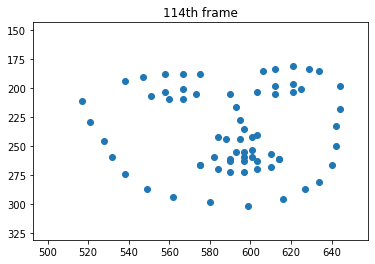

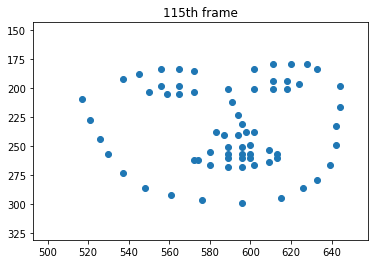

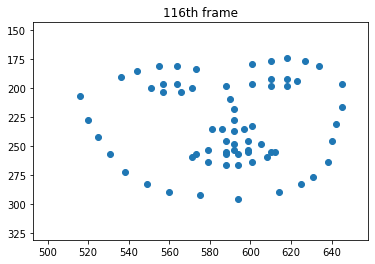

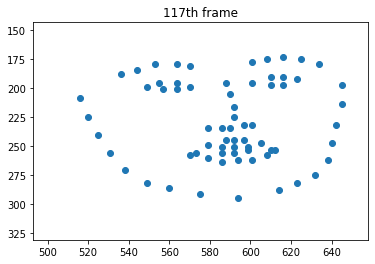

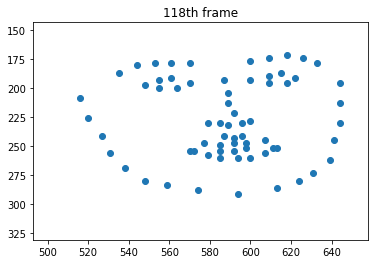

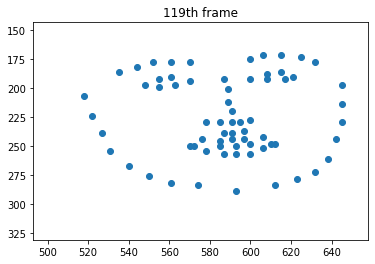

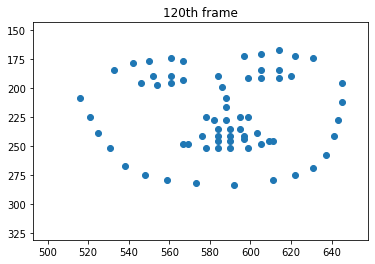

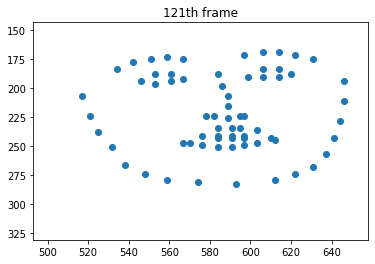

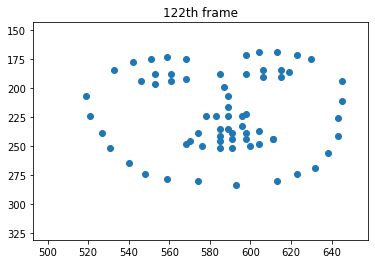

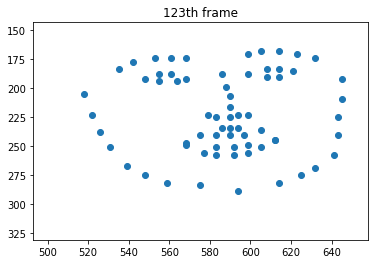

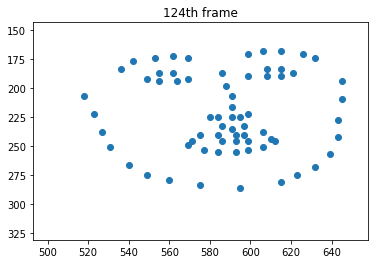

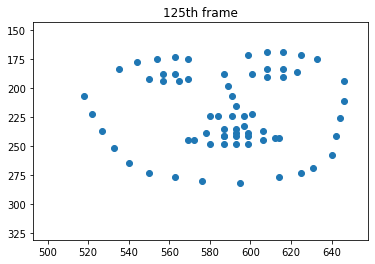

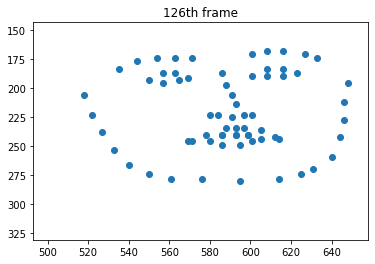

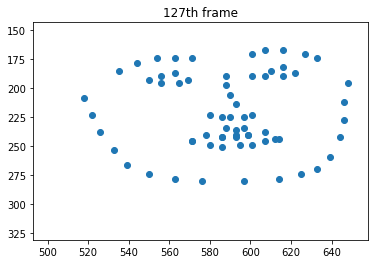

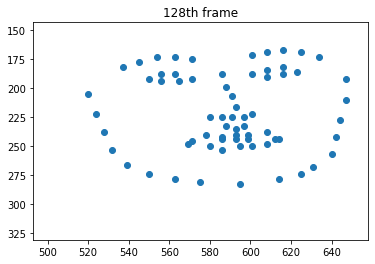

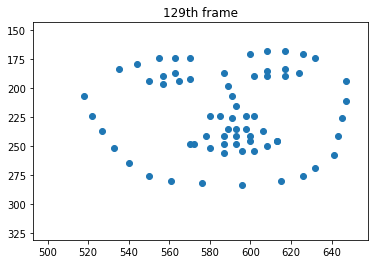

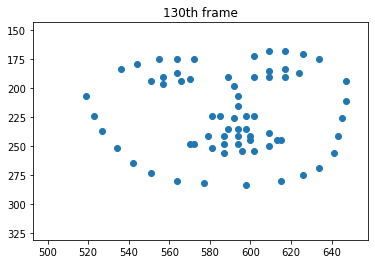

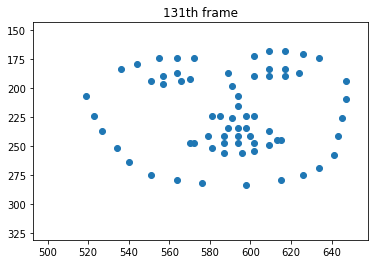

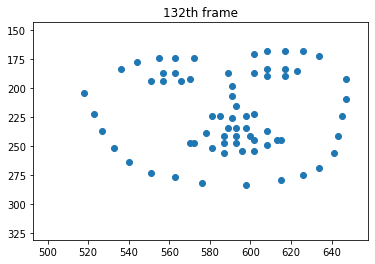

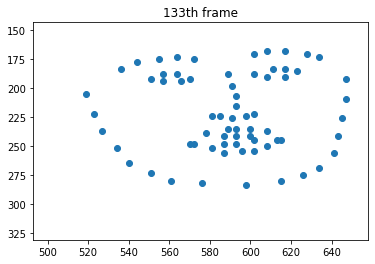

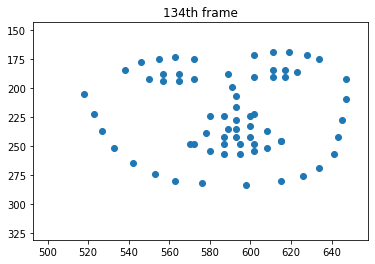

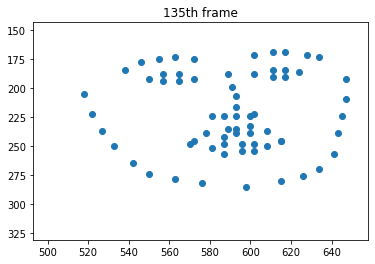

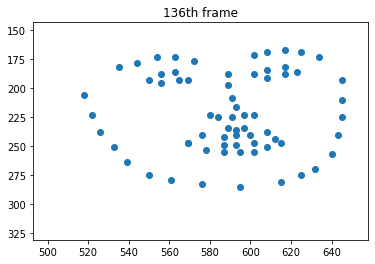

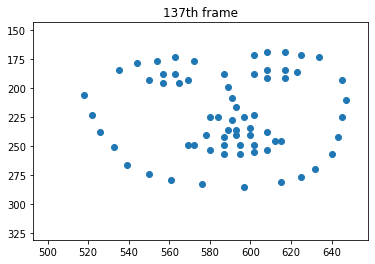

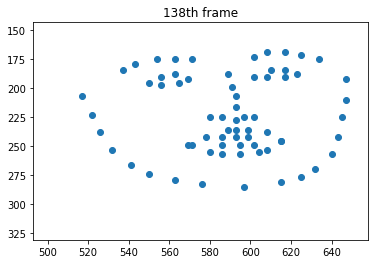

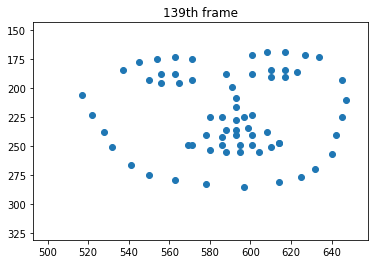

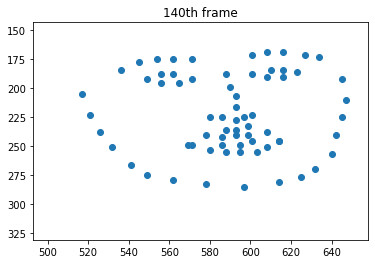

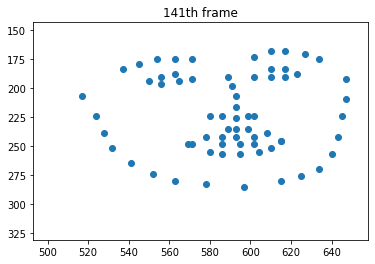

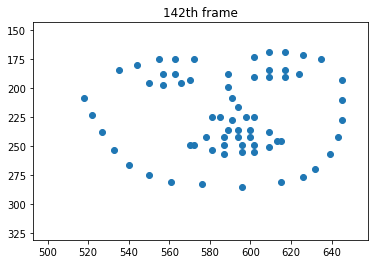

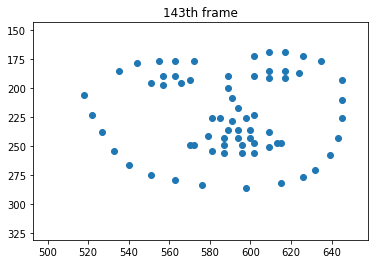

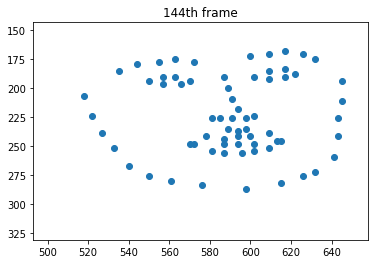

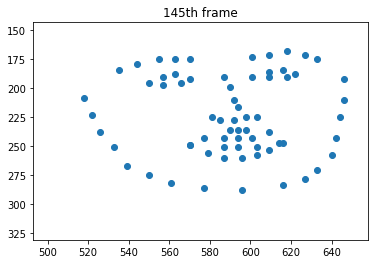

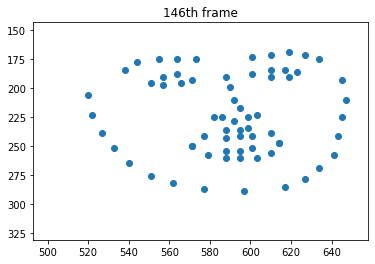

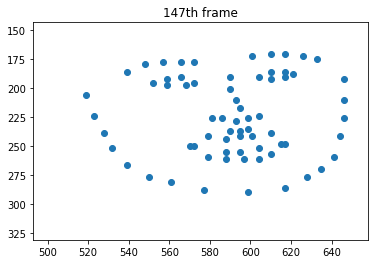

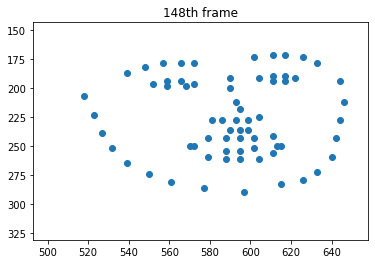

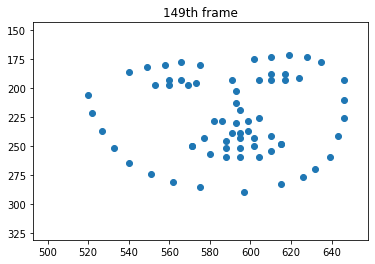

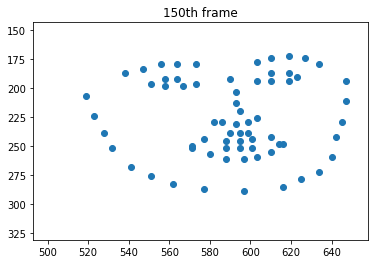

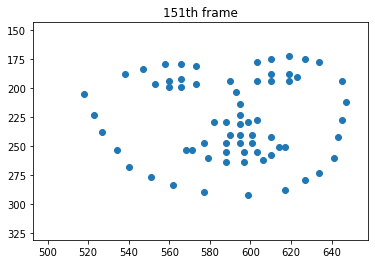

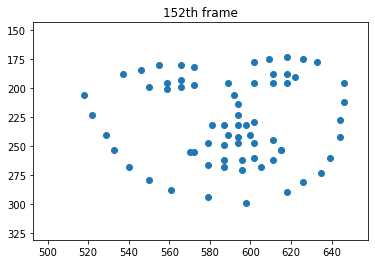

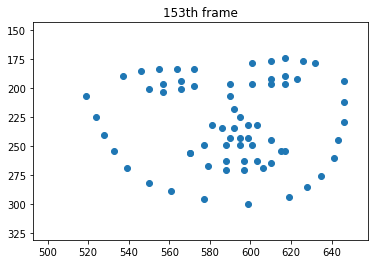

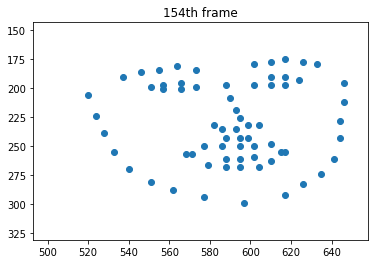

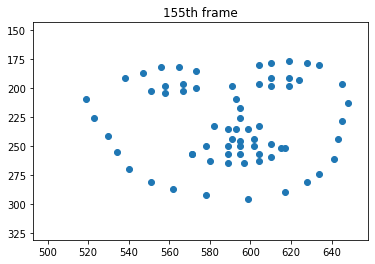

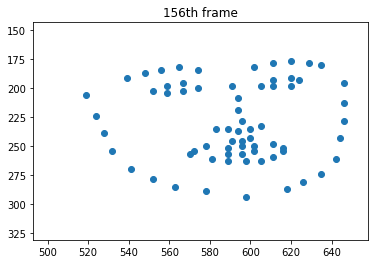

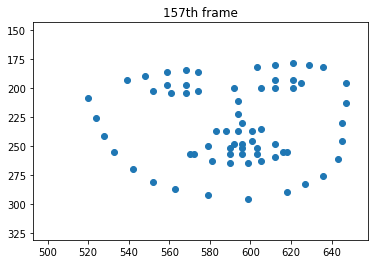

In [89]:
import matplotlib.pyplot as plt
import os

os.makedirs('DEBUG', exist_ok=True)


emotion2num = {'anger': 0,
               'disgust': 1,
               'fear': 2,
               'joy': 3,
               'neutral': 4,
               'sadness': 5, 
               'surprise': 6}


num2emotion = {val: key for key, val in emotion2num.items()}
num2onehot = {0: np.array([1, 0, 0, 0, 0, 0, 0]),
              1: np.array([0, 1, 0, 0, 0, 0, 0]),
              2: np.array([0, 0, 1, 0, 0, 0, 0]),
              3: np.array([0, 0, 0, 1, 0, 0, 0]),
              4: np.array([0, 0, 0, 0, 1, 0, 0]),
              5: np.array([0, 0, 0, 0, 0, 1, 0]),
              6: np.array([0, 0, 0, 0, 0, 0, 1])}


query_idx = 40

X_chosen = X['train'][query_idx]
y_chosen = y['train'][query_idx]
num = np.where(y_chosen !=0)[0][0]

original_diautt_chosen = original_diautt['train'][query_idx]

x_min, x_max = X_chosen[:,:,0].min(), X_chosen[:,:,0].max()
y_min, y_max = X_chosen[:,:,1].min(), X_chosen[:,:,1].max()
margin = 10

print(y_chosen, num, num2emotion[num])

for idx, landmark in enumerate(X_chosen):
    plt.figure()
    plt.xlim((x_min-margin, x_max+margin))
    plt.ylim((y_min-margin, y_max+margin))
    plt.gca().invert_yaxis()
    plt.scatter(landmark[:,0], landmark[:,1])
    plt.title(f"{idx}th frame")
    plt.savefig(f'DEBUG/{str(idx).zfill(5)}.png')

In [90]:
from glob import glob
import random
import os
import json
import numpy as np
import av
import matplotlib.pyplot as plt
import cv2
import random
from IPython.display import HTML
from base64 import b64encode

VIDEOS_PATH = "smaller-dataset/"

vid_path = os.path.join(VIDEOS_PATH, original_diautt_chosen) +  '.mp4'
container = av.open(vid_path)

frames = {}
for idx, frame in enumerate(container.decode(video=0)):
    numpy_RGB = np.array(frame.to_image())
    frames[idx] = numpy_RGB

print(vid_path)
annot = datasets['train'][original_diautt_chosen]

for key, val in annot.items():
    print(f"{key}: \t {val}")

mp4 = open(vid_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=720 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

smaller-dataset/dia111_utt15.mp4
SrNo: 	 1096
Utterance: 	 Yes, on a scale from 1 to 10, 10 being the dumbest a person can look, you are definitely 19.
Speaker: 	 Chandler
Emotion: 	 disgust
Sentiment: 	 negative
Dialogue_ID: 	 111
Utterance_ID: 	 15
Season: 	 7
Episode: 	 1
StartTime: 	 00:08:53,241
EndTime: 	 00:08:59,829


In [92]:
!rm out.mp4
!ffmpeg -i DEBUG/%05d.png -c:v libx264 -vf fps=24 -pix_fmt yuv420p out.mp4

vid_path = 'out.mp4'

mp4 = open(vid_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=720 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib